In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks

# BFS iterative

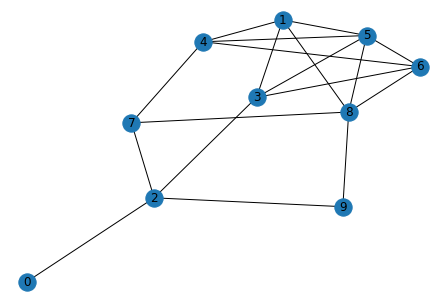

In [10]:
G = nx.erdos_renyi_graph(10, 0.3)
    
nx.draw(G, with_labels=True)

In [11]:
def BFS_iterative(graph, node):
    queue = []
    queue.append(node)
    graph.nodes[node]['marked'] = True
    
    while queue:
        popped = queue.pop(0)
        
        for neighbor in graph.adj[popped]:
            if not graph.nodes[neighbor]['marked']:
                print(f'marking edge: ({popped}, {neighbor})')
                graph.edges[popped, neighbor]['marked'] = True
                graph.nodes[neighbor]['marked'] = True
                queue.append(neighbor)  

In [12]:
clear_marks(G)
BFS_iterative(G, 0)

marking edge: (0, 2)
marking edge: (2, 3)
marking edge: (2, 7)
marking edge: (2, 9)
marking edge: (3, 1)
marking edge: (3, 5)
marking edge: (3, 6)
marking edge: (7, 4)
marking edge: (7, 8)


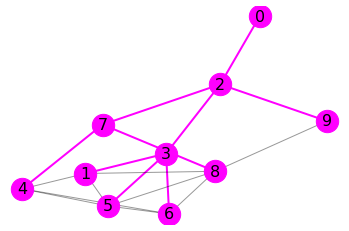

In [13]:
draw_graph(G)